## 1. Vehicle Routing Problem

In [5]:
import numpy as np
from Numberjack import *
import matplotlib.pyplot as plt
import networkx as ntx


a) rede de estradas <=> grafo orientado

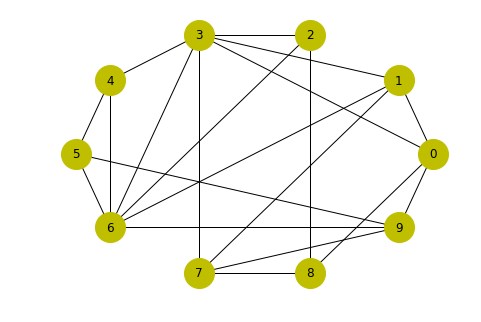

{(7, 8, 6), (9, 0, 5), (6, 1, 9), (1, 3, 1), (6, 4, 4), (3, 7, 5), (8, 7, 6), (3, 6, 8), (5, 6, 5), (3, 0, 6), (9, 7, 5), (6, 2, 5), (8, 2, 6), (1, 6, 9), (2, 3, 3), (2, 6, 5), (6, 3, 8), (9, 5, 5), (6, 9, 8), (3, 2, 3), (7, 1, 4), (6, 5, 5), (0, 1, 8), (3, 1, 1), (7, 3, 5), (1, 7, 4), (5, 9, 5), (3, 4, 9), (1, 0, 8), (4, 5, 5), (0, 3, 6), (4, 3, 9), (0, 8, 9), (5, 4, 5), (0, 9, 5), (9, 6, 8), (8, 0, 9), (4, 6, 4), (2, 8, 6), (7, 9, 5)}


In [6]:

Nodes = 10
Carros = 3

g = ntx.DiGraph()
g = ntx.connected_watts_strogatz_graph(Nodes,4,0.5)

EdgesP = set()
for i, j in g.edges():
    r = np.random.randint(1,10)
    EdgesP.add((i,j,r))
    EdgesP.add((j,i,r))

ntx.draw_shell(g,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

print(EdgesP)

b)  $C_{i,j}$ e $t_{i,j}$ 

os carros começam no nodo 0

[2 5 9]


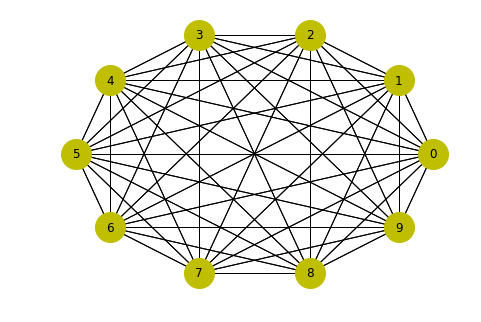

In [7]:
G = ntx.DiGraph()

def procura(i,j,E):
    for k,l,n in E:
        if(k==i and l==j):
            return n
    return 0

G.add_nodes_from(g)
for i, j in g.edges():
    p = procura(i,j,EdgesP)
    G.add_edge(i, j, weight = p)
    G.add_edge(j, i, weight = p)
    
dic = ntx.shortest_path(G, weight = 'weight')

for k1, d in dic.items():
    for k2, l in d.items():
        w=0
        for i in range(len(l)-1):
            w += procura(l[i],l[i+1],EdgesP)
        EdgesP.add((k1,k2,w))
        EdgesP.add((k2,k1,w))
        G.add_edge(k1,k2, weight = w)
        G.add_edge(k2,k1, weight = w)
   


NumClientes = 6

Clientes = np.unique(np.random.choice(range(1,Nodes), NumClientes))
print(Clientes)


Rotas = [VarArray(Nodes*3,Nodes) for i in range (Carros)]

#print(G.edges(data=True))
ntx.draw_shell(G,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

c) Restrições

In [17]:
aux=[]
model=Model()
for i in Rotas:
    model.add(i[0]==0)
    w = 0
    for j in range(1,Nodes*3-1):        
        if(i[j]==0):
            model.add(i[j+1]==0)
        else:
            model.add(i[j] in Clientes)
            w += procura(i[j],i[j+1],EdgesP)
            if j-1==0:
                w += procura(0,i[1],EdgesP)
            if(i[j] not in aux):
                aux.append(i[j])

model.add(Minimize(w))
#if (aux==Clientes.tolist()):
print(model.load('SCIP').solve())

          
          
#model.add(Minimize(c))        
#model.add(set(aux)==set(Clientes))
#model.add(Minimize(w))

#print(model)
#print(Clientes)
#print(set(Clientes))


TypeError: in method 'new_MipWrapper_Minimise', argument 1 of type 'MipWrapper_Expression *'

In [9]:
#print(Sum(map(lambda x: coisas(x[1]!=0), Rotas)))

    

## 2. Sudoku

In [10]:
N = 3
NS = N*N
Gre = Matrix(NS,NS,1,NS)
model = Model()


## Popular a Grelha de Sudoku





Preencher a Grelha
todos os pequenos quadrados têm diferentes números

$\forall_{i< N²}\forall_{j< N²}\forall_{i<i2\leq N²}
\forall_{j<j2\leq N²}\big(M[i,j] =M[i2,j2] \Rightarrow \big(i/N \neq i2/N\big) \vee \big(j/N \neq j2/N\big)  \big)$
        
todas as linhas têm diferentes números

$\forall_{i\leq N²}\forall_{j< N²}\forall_{j<j2\leq N²}\big(M[i,j] \neq M[i,j2] \big)$

todas as colunas têm diferentes números

$\forall_{i< N²}\forall_{i<i2\leq N²}\forall_{j\leq N²}\big(M[i,j] \neq M[i2,j] \big)$


In [11]:
for i in range(N):
    for j in range(N):
        model.add(AllDiff(Gre[i*N:(i+1)*N,j*N:(j+1)*N].flat))
        model.add(AllDiff(Gre[i*N+j]))
        model.add(AllDiff(Gre.col[i*N+j]))



Resolver

In [12]:
model.load('SCIP').solve()

print(Gre)

[[8, 3, 5, 9, 1, 6, 7, 4, 2],
 [7, 6, 9, 4, 5, 2, 3, 1, 8],
 [1, 2, 4, 7, 3, 8, 5, 6, 9],
 [9, 5, 6, 2, 8, 1, 4, 3, 7],
 [3, 8, 7, 6, 9, 4, 1, 2, 5],
 [4, 1, 2, 5, 7, 3, 9, 8, 6],
 [6, 7, 3, 1, 2, 9, 8, 5, 4],
 [2, 9, 1, 8, 4, 5, 6, 7, 3],
 [5, 4, 8, 3, 6, 7, 2, 9, 1]]
